In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/avakh/Desktop/sml_4_data/data/countries-aggregated_csv.csv")

In [3]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [4]:
df1=df.loc[df['Country'] =='Costa Rica']

In [5]:
df2=df1[['Date','Confirmed']]

In [6]:
df2.reset_index(drop=True, inplace=True)

In [7]:
df2.set_index('Date',inplace=True)

In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [9]:
import statsmodels.api as sm

import matplotlib.pyplot as plt

In [10]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df2['Confirmed'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\avakh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\avakh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [11]:
l1=results.predict(start=552,end=600,dynamic=True)


In [12]:
l1

2021-07-27    399546.819467
2021-07-28    400630.993144
2021-07-29    401929.769561
2021-07-30    403338.270588
2021-07-31    403947.478540
2021-08-01    405020.287096
2021-08-02    406125.959858
2021-08-03    407060.075084
2021-08-04    408286.378051
2021-08-05    409524.787358
2021-08-06    410935.775275
2021-08-07    412322.200430
2021-08-08    413418.977138
2021-08-09    414611.059829
2021-08-10    415630.073423
2021-08-11    416734.002863
2021-08-12    417893.815973
2021-08-13    419044.092502
2021-08-14    420260.048430
2021-08-15    421404.282995
2021-08-16    422624.737256
2021-08-17    423597.032600
2021-08-18    424702.886496
2021-08-19    425789.731251
2021-08-20    426864.684231
2021-08-21    428046.259081
2021-08-22    429142.417445
2021-08-23    430329.100899
2021-08-24    431378.312470
2021-08-25    432524.963796
2021-08-26    433729.874980
2021-08-27    434840.491815
2021-08-28    436076.158716
2021-08-29    437122.512675
2021-08-30    438311.247601
2021-08-31    439479

In [13]:
df2

,Confirmed
Date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2021-07-22,397469
2021-07-23,398608
2021-07-24,398608


In [14]:
type(l1)

pandas.core.series.Series

In [15]:
l1.to_frame()

,predicted_mean
2021-07-27,399546.819467
2021-07-28,400630.993144
2021-07-29,401929.769561
2021-07-30,403338.270588
2021-07-31,403947.478540
2021-08-01,405020.287096
2021-08-02,406125.959858
2021-08-03,407060.075084
2021-08-04,408286.378051
2021-08-05,409524.787358


In [16]:
frames = [df2, l1]

In [17]:
result = pd.concat(frames)

In [18]:
result

,Confirmed,0
2020-01-22,0.0,NaN
2020-01-23,0.0,NaN
2020-01-24,0.0,NaN
2020-01-25,0.0,NaN
2020-01-26,0.0,NaN
...,...,...
2021-09-09 00:00:00,NaN,449894.798185
2021-09-10 00:00:00,NaN,450938.297457
2021-09-11 00:00:00,NaN,452122.182927
2021-09-12 00:00:00,NaN,453286.087453


<AxesSubplot:>

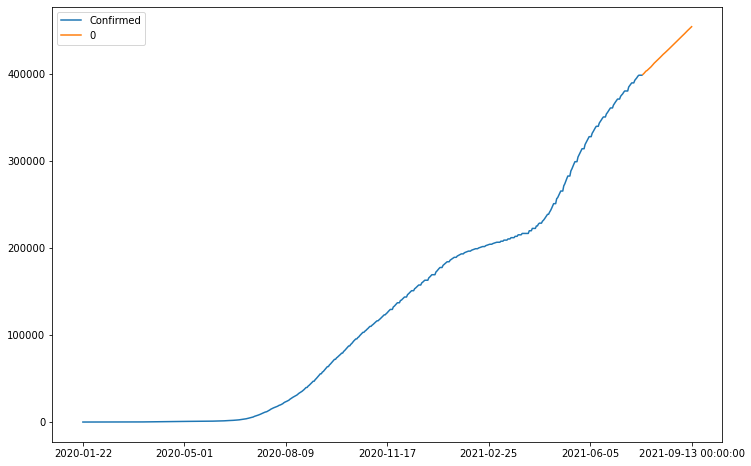

In [22]:
result[['Confirmed',0]].plot(figsize=(12,8))

In [23]:
df7=df.loc[df['Country'] =='Afghanistan']

In [24]:
df8=df7[['Date','Deaths']]

In [25]:
df8.reset_index(drop=True, inplace=True)

In [26]:
df8.set_index('Date',inplace=True)

In [27]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df8['Deaths'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\avakh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\avakh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [28]:
l2=results.predict(start=552,end=600,dynamic=True)

In [33]:
l2.to_frame()

,predicted_mean
2021-07-27,6551.371655
2021-07-28,6612.467362
2021-07-29,6707.885815
2021-07-30,6777.934240
2021-07-31,6817.810606
2021-08-01,6874.883379
2021-08-02,6940.527749
2021-08-03,7003.569061
2021-08-04,7069.172754
2021-08-05,7159.855113


In [34]:
frames = [df8, l2]

In [35]:
result = pd.concat(frames)

<AxesSubplot:>

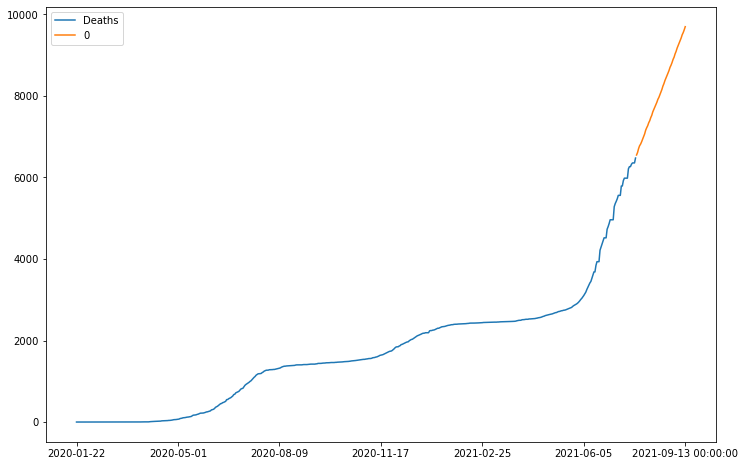

In [37]:
result[['Deaths',0]].plot(figsize=(12,8))